In [1]:
import subprocess
import os

result = subprocess.run('bash -c "source /etc/network_turbo && env | grep proxy"', shell=True, capture_output=True, text=True)
output = result.stdout
for line in output.splitlines():
    if '=' in line:
        var, value = line.split('=', 1)
        os.environ[var] = value

In [2]:
import torch, os, argparse, json
import numpy as np
from model import Model

/root/autodl-tmp/miniconda3/envs/integrate/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/root/FETV-EVAL/text2video-zero/annotator/openpose/body.py:5: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter
/root/FETV-EVAL/text2video-zero/annotator/openpose/hand.py:6: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter
/root/autodl-tmp/miniconda3/envs/integrate/lib/python3.9/site-packages/skimage/util/dtype.py:27: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  np.bool8: (False, True),


cuda
cuda


In [3]:
model = Model(device="cuda", dtype=torch.float16)

In [6]:
prompt='Aru you OK'
fps = 8
out_file = "~/123.mp4"
model_path = "stabilityai/stable-diffusion-2-1-base"
seed=42
num_frame=8
with_watermark=False
reference_model="ViT-g-14"
reference_model_pretrain="laion2b_s12b_b42k"

In [7]:
result = model.process_text2video(
    prompt,
    fps=fps,
    path=out_file,
    t0=44,
    t1=47,
    motion_field_strength_x=12,
    motion_field_strength_y=12,
    model_name=model_path,
    video_length=num_frame,
    seed=seed,
    watermark=None,
    with_watermark=with_watermark,
    reference_model=reference_model,
    reference_model_pretrain=reference_model_pretrain,
)

Module Text2Video
t0 = 881 t1 = 941


  6%|▌         | 3/50 [00:00<00:01, 26.71it/s]

Continue DDIM with i = 0, t = 981, latent = torch.Size([1, 4, 64, 64]), device = cuda:0, type = torch.float16
latent t1 found at i=1, t = 961
latent t0 found at i = 4, t = 901


100%|██████████| 50/50 [00:01<00:00, 27.64it/s]
/root/autodl-tmp/miniconda3/envs/integrate/lib/python3.9/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/root/autodl-tmp/miniconda3/envs/integrate/lib/python3.9/site-packages/torch/nn/functional.py:4296: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. 

Continue DDIM with i = 2, t = 941, latent = torch.Size([8, 4, 64, 64]), device = cuda:0, type = torch.float16


 96%|█████████▌| 48/50 [00:09<00:00,  5.33it/s]


In [16]:
import torchvision
output=[]
for i, x in enumerate(result):
    x = torchvision.utils.make_grid(torch.Tensor(x), nrow=4)
    x = (x * 255).numpy().astype(np.uint8)
    output.append(x)

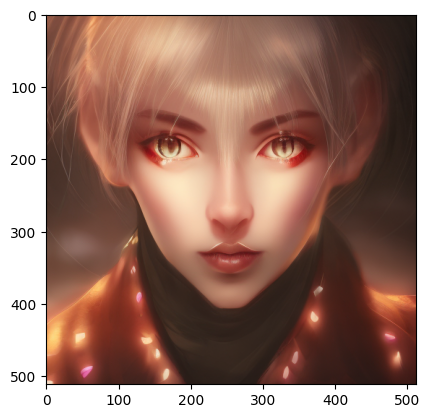

In [17]:
import matplotlib.pyplot as plt
plt.imshow(output[0])
plt.show()

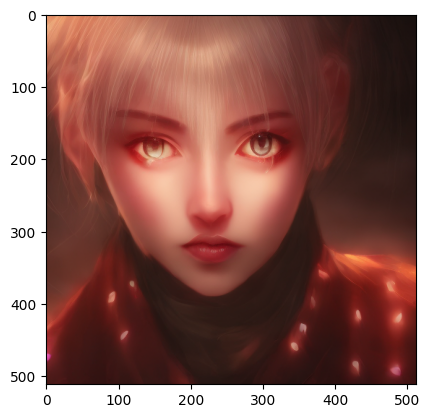

In [19]:
plt.imshow(output[5])
plt.show()

In [22]:
import utils
from tree_ring.optim_utils import *
import open_clip
ref_model, _, ref_clip_preprocess = open_clip.create_model_and_transforms(reference_model, pretrained=reference_model_pretrain, device="cuda:0")
ref_tokenizer = open_clip.get_tokenizer(reference_model)

array([[[149,  97,  82],
        [156,  97,  84],
        [151,  92,  78],
        ...,
        [ 35,  27,  23],
        [ 33,  26,  22],
        [ 34,  28,  24]],

       [[155,  99,  80],
        [161,  99,  81],
        [155,  93,  76],
        ...,
        [ 34,  26,  24],
        [ 31,  28,  23],
        [ 33,  27,  23]],

       [[158, 100,  82],
        [154,  95,  75],
        [158,  98,  78],
        ...,
        [ 34,  26,  24],
        [ 34,  28,  24],
        [ 32,  25,  23]],

       ...,

       [[253, 215, 189],
        [247, 217, 195],
        [246, 221, 199],
        ...,
        [ 52,  24,  20],
        [ 52,  24,  19],
        [ 50,  23,  20]],

       [[251, 213, 182],
        [248, 217, 188],
        [246, 219, 194],
        ...,
        [ 52,  24,  19],
        [ 51,  24,  20],
        [ 51,  24,  20]],

       [[249, 219, 188],
        [253, 225, 198],
        [243, 216, 194],
        ...,
        [ 51,  24,  22],
        [ 51,  22,  20],
        [ 45,  23,  18]]

In [26]:
from PIL import Image
import numpy as np
sims = measure_similarity([Image.fromarray(np.uint8(output[0])),Image.fromarray(np.uint8(output[5]))], prompt, ref_model, ref_clip_preprocess, ref_tokenizer, "cuda:0")

In [27]:
sims[0]

tensor(0.2217, device='cuda:0')

In [28]:
sims[1]

tensor(0.2205, device='cuda:0')